
# **PART III-A : 2-input predictor for a 3-hour horizon**

# dataset
**Retrieving the  GEFCom2014 (E, V2) Data**

The data in this project is taken from the GEFCom2014 forecasting competition. It consists of hourly electricity load ("eload") and temperature ("tempf") values for a USA city. *italicized text*
The data will be brought into the Colab session from an internet repository, aand the extracted Ecel file will be used to create a comma-seprated-value (csv) text file, similar to the one in Chapter 10 of te textbook.

In [ ]:
import numpy as np 
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt
# from common.utils import load_data, extract_data, download_file
%matplotlib inline

# !wget https://mlftsfwp.blob.core.windows.net/mlftsfwp/GEFCom2014.zip
!wget https://www.dropbox.com/s/pqenrr2mcvl0hk9/GEFCom2014.zip



--2023-04-28 07:44:34--  https://www.dropbox.com/s/pqenrr2mcvl0hk9/GEFCom2014.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/pqenrr2mcvl0hk9/GEFCom2014.zip [following]
--2023-04-28 07:44:35--  https://www.dropbox.com/s/raw/pqenrr2mcvl0hk9/GEFCom2014.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc894ecf0ac03b8110e4ae549417.dl.dropboxusercontent.com/cd/0/inline/B7BPX0FWJk3gyGBGsolo0ECSzU1djIX4smAvojVz8mpTHnRpMSncX4NYSdd0Kra05hCHiFrSv9WIMJfzK0qrcwc92-g1qSZ6SghTVIdPYFM3tVTVib-ZcaMqIjcpG7EPMeT1tt2sH4ohl6syXCTB9jwyH1d5k5EReVdGdsKL-7aEUw/file# [following]
--2023-04-28 07:44:36--  https://uc894ecf0ac03b8110e4ae549417.dl.dropboxusercontent.com/cd/0/inline/B7BPX0FWJk3gyGBGsolo0ECSzU1djIX4smAvojVz8mpTHnRpMSncX4NYSdd0Kra05hCHiFr

In [ ]:
# !ls -l 
!unzip GEFCom2014.zip

Archive:  GEFCom2014.zip
replace GEFCom2014 Data/GEFCom2014-S_V2.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: GEFCom2014 Data/GEFCom2014-S_V2.zip  
replace GEFCom2014 Data/GEFCom2014-W_V2.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace GEFCom2014 Data/READ ME_V2.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: GEFCom2014 Data/READ ME_V2.txt  
replace GEFCom2014 Data/Provisional_Leaderboard_V2.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace GEFCom2014 Data/GEFCom2014-L_V2.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: GEFCom2014 Data/GEFCom2014-L_V2.zip  
replace GEFCom2014 Data/GEFCom2014-E_V2.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace GEFCom2014 Data/GEFCom2014-P_V2.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
!ls -l

total 253368
-rw-r--r-- 1 root root    328960 Apr 28 07:32  best_model.h5
-rw-r--r-- 1 root root   1573348 Apr 28 07:35  GEF14.csv
drwxrwxr-x 2 root root      4096 Apr 28 07:46 'GEFCom2014 Data'
-rw-rw-r-- 1 root root   2348089 Feb 11  2016  GEFCom2014-E_V2.zip
-rw-r--r-- 1 root root   2452214 Jan 25  2016  GEFCom2014-E.xlsx
-rw-r--r-- 1 root root 126360077 Apr 28 07:27  GEFCom2014.zip
-rw-r--r-- 1 root root 126360077 Apr 28 07:44  GEFCom2014.zip.1
drwxr-xr-x 1 root root      4096 Apr 26 17:36  sample_data


In [ ]:
!ls -l 'GEFCom2014 Data'/

total 123420
-rw-rw-r-- 1 root root  2348089 Feb 11  2016  GEFCom2014-E_V2.zip
-rw-rw-r-- 1 root root  2599214 Feb 11  2016  GEFCom2014-L_V2.zip
-rw-rw-r-- 1 root root  3338992 Feb 11  2016  GEFCom2014-P_V2.zip
-rw-rw-r-- 1 root root 36734790 Feb 11  2016  GEFCom2014-S_V2.zip
-rw-rw-r-- 1 root root 81149634 Feb 11  2016  GEFCom2014-W_V2.zip
-rw-rw-r-- 1 root root   195932 Feb 11  2016  Provisional_Leaderboard_V2.xlsx
-rw-rw-r-- 1 root root      389 Feb 11  2016 'READ ME_V2.txt'


** We are interested in GEFCom2014-E_V2.zip**

In [ ]:
# Let's bring it to the top level before unzipping it
!mv  'GEFCom2014 Data'/GEFCom2014-E_V2.zip  ./

In [ ]:
!unzip GEFCom2014-E_V2.zip

Archive:  GEFCom2014-E_V2.zip
replace GEFCom2014-E.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: GEFCom2014-E.xlsx       


In [ ]:
# We can now verify that we hot the file GEFCom2014-E.xlsx
!ls -l

total 253368
-rw-r--r-- 1 root root    328960 Apr 28 07:32  best_model.h5
-rw-r--r-- 1 root root   1573348 Apr 28 07:35  GEF14.csv
drwxrwxr-x 2 root root      4096 Apr 28 07:46 'GEFCom2014 Data'
-rw-rw-r-- 1 root root   2348089 Feb 11  2016  GEFCom2014-E_V2.zip
-rw-r--r-- 1 root root   2452214 Jan 25  2016  GEFCom2014-E.xlsx
-rw-r--r-- 1 root root 126360077 Apr 28 07:27  GEFCom2014.zip
-rw-r--r-- 1 root root 126360077 Apr 28 07:44  GEFCom2014.zip.1
drwxr-xr-x 1 root root      4096 Apr 26 17:36  sample_data


***We have GEFCom2014-E.xlsx***

This script will "translate" the .xlsx file to a .cvs file, so that the initial situation is the same as for the Jena temperature example from Chapter 10 of textbook - IN THIS PROCESS WE WILL ALSO REMOVE THE MLTIPLE INITIAL LINES THAT DO NOT HAVE LOAD VALUES (this is done through the "skip_rows" parameter)

In [ ]:
# CONVERT GEFCom2014-E.xlsx to a PANDAS DATAFRAME called GEFDF
# import pandas as pd

GEFDF = pd.read_excel('GEFCom2014-E.xlsx', skiprows=range(1, 17545), dtype = {'A':np.int32  ,'B':np.int8   ,'C':np.int32  ,'D':np.float64}, index_col = None )


In [ ]:
# We can "see" the Pandas DataFrame (called GEFDF) that has been obtained
print(GEFDF)

            Date  Hour    load          T
0     2006-01-01     1  3010.0  22.666667
1     2006-01-01     2  2853.0  20.666667
2     2006-01-01     3  2758.0  21.333333
3     2006-01-01     4  2705.0  19.000000
4     2006-01-01     5  2709.0  19.333333
...          ...   ...     ...        ...
78883 2014-12-31    20  4012.0  18.000000
78884 2014-12-31    21  3856.0  16.666667
78885 2014-12-31    22  3671.0  17.000000
78886 2014-12-31    23  3499.0  15.333333
78887 2014-12-31    24  3345.0  15.333333

[78888 rows x 4 columns]


In [ ]:
# Now writing out the GEFDF dataframe to a text (csv) file
GEFDF.to_csv('GEF14.csv',  encoding='utf-8', index=False, header=True, columns=['Hour','load','T'],line_terminator='\n' )
with open('GEF14.csv') as f:
    lines = f.readlines()
    last = len(lines) - 1
    lines[last] = lines[last].replace('\r','').replace('\n','')
with open('GEF14.csv', 'w') as wr:
    wr.writelines(lines)

<ipython-input-70-95d21a26e29b>:2: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  GEFDF.to_csv('GEF14.csv',  encoding='utf-8', index=False, header=True, columns=['Hour','load','T'],line_terminator='\n' )


In [ ]:
# verifying we have created the csv file GEF14.csv
!ls -l ./

total 253368
-rw-r--r-- 1 root root    328960 Apr 28 07:32  best_model.h5
-rw-r--r-- 1 root root   1573348 Apr 28 07:46  GEF14.csv
drwxrwxr-x 2 root root      4096 Apr 28 07:46 'GEFCom2014 Data'
-rw-rw-r-- 1 root root   2348089 Feb 11  2016  GEFCom2014-E_V2.zip
-rw-r--r-- 1 root root   2452214 Jan 25  2016  GEFCom2014-E.xlsx
-rw-r--r-- 1 root root 126360077 Apr 28 07:27  GEFCom2014.zip
-rw-r--r-- 1 root root 126360077 Apr 28 07:44  GEFCom2014.zip.1
drwxr-xr-x 1 root root      4096 Apr 26 17:36  sample_data


From this point onwards, the preparation is similar as for the Jena temperature prediction case from the book but the columns in this file are just:

hour( 1 to 24) ; LOAD (e.g., 4012.0 ) ; TEMP (in oF ,  e.g., 86.5)

**Inspecting the data of the GEFC14.csv FILE**

This will separate the heade from the rest, whicj will be kept in "lines"

In [ ]:
# THIS CODE CELL IS ESSENTIALLY THE SAME AS IN THE EXAMPLE FROM CH. 10 IN BOOK
import os
fname = os.path.join("GEF14.csv")

with open(fname) as f:
    data = f.read()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]
print(header)
print(len(lines))

['Hour', 'load', 'T']
78888


**Parsing the data**

We will separate temperatures in tempf, loads in eload and both in raw_data (Hour will be ignored) 

In [ ]:
# VERY SIMILAR TO THE CORRESPONDING C0DE CELL FROM CHAPTER 10 IN BOOK
# eload (electric load) is the timeseries we will predict
# tempf (temperature in Fahrenheit) is the temperature at the same time
# import numpy as np
eload = np.zeros((len(lines),))
tempf = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header)-1))  
raw_data2 = np.zeros((len(lines), len(header)-2))  #chgd )-1  to )-2 to also
# remove the HOUR column, in addition to the DATE column
print(len(lines))
#raw_data = np.column_stack((eload, tempf))

for m in range(78888):
    thisline  = lines[m]
    values = [float(x) for x in thisline.split(",")[1:]]
    eload[m] = values[0]         #Captures JUST E LOAD
    tempf[m] = values[1]            #Captures JUST TEMPF
    raw_data2[m] = values[0]         #Like this, raw_data Captures JUST E LOAD
    raw_data[m, :] = values[:]   # Like this, raw_data CAPTURES BOTH

78888


**Plotting the eload timeseries**

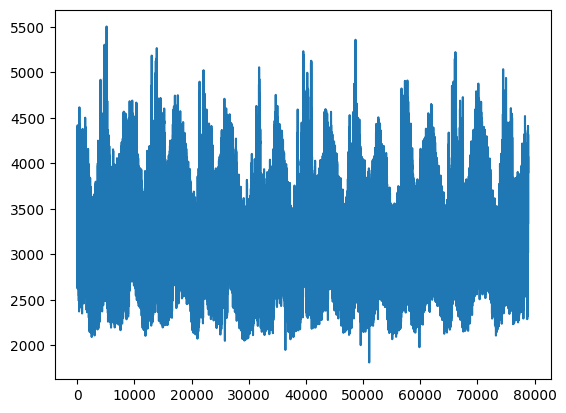

In [ ]:
from matplotlib import pyplot as plt
plt.plot(range(len(eload)), eload)

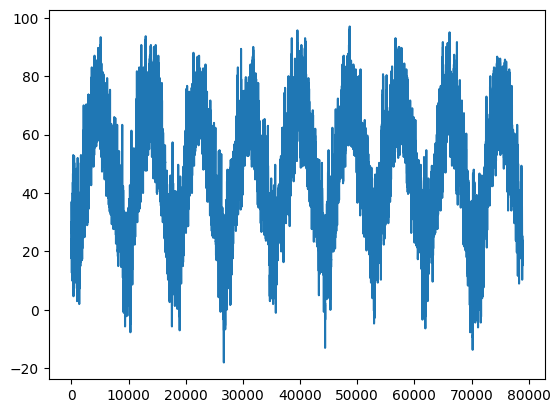

In [ ]:
plt.plot(range(len(tempf)), tempf)

**THIS IS THE BEGINNING OF THE ACTUAL SOLUTION**

**Computing the number of samples we'll use for each data split**

In [ ]:
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 39444
num_val_samples: 19722
num_test_samples: 19722


### Preparing the data

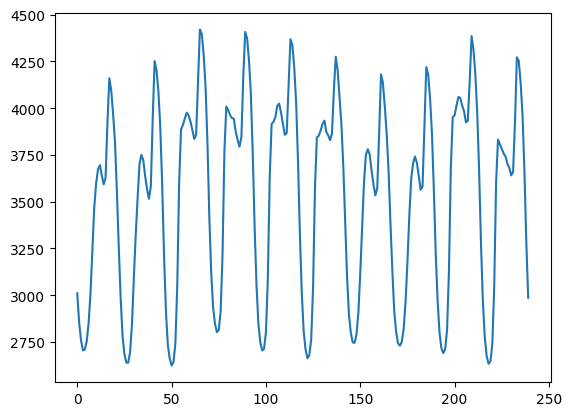

In [ ]:
# Display the ELOAD for the first 10 days
plt.plot(range(240),eload[:240])

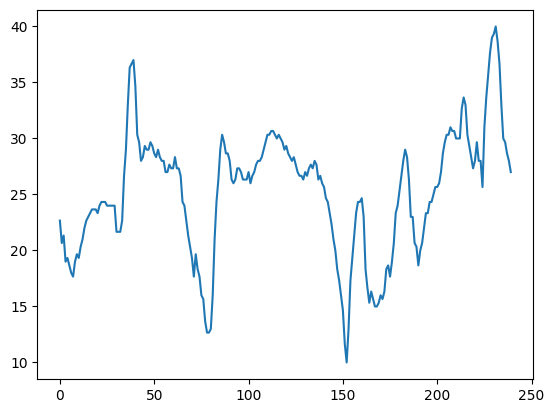

In [ ]:
# Display the tempf for the first 10 days
plt.plot(range(240),tempf[:240])

**Normalizing the data**

In [ ]:
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std

In [ ]:
mean2 = raw_data2[:num_train_samples].mean(axis=0)
raw_data2 -= mean2
std2 = raw_data2[:num_train_samples].std(axis=0)
raw_data2 /= std2

In [ ]:
mean

array([3310.41855542,   46.73044485])

In [ ]:
std

array([585.83380329,  18.95383242])

In [ ]:
mean2

array([3310.41855542])

In [ ]:
std2

array([585.83380329])

In [ ]:
raw_data2


array([[3010.],
       [2853.],
       [2758.],
       ...,
       [3671.],
       [3499.],
       [3345.]])

# Instantiating datasets for training, validation, and testing for 3 hour two input

In [ ]:
# LETS JUST USE ELOAD TO FORECAST ELOAD
# THIS TIME, ( 2-input case)
from tensorflow import keras

horizon = 3      # Num. of hours ahead for forecast
sampling_rate = 1
sequence_length = 12
delay = sampling_rate * (sequence_length + horizon - 1) 
batch_size = 128

train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],    
    targets=raw_data2[delay:], # This would used "Normalized Targets"
   # targets=eload[delay:], # This would used "Not-normalized eload targets"
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,                  #changed to false JUST FOR VERIF
    batch_size= num_train_samples,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],    # changed from raw_data to just eload not really
    targets=raw_data2[delay:],  # This would used "Normalized Targets"
    #targets=eload[delay:], # This would used "Not-normalized eload targets"
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=num_val_samples,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],     # changed from raw_data to just eload
    targets=raw_data2[delay:],  # This would used "Normalized Targets"
    #targets=eload[delay:], # This would used "Not-normalized eload targets"
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=False,
    batch_size=num_test_samples,
    start_index=num_train_samples + num_val_samples)

In [ ]:

max_eload=0
min_eload=np.inf
for x, y in test_dataset:
    eload_values = y  # extract the eload values from the target array
    max_eload_in_batch = np.max(eload_values)
    if max_eload_in_batch > max_eload:
      max_eload = max_eload_in_batch

    min_eload_in_batch = np.min(eload_values)
    if min_eload_in_batch < min_eload:
        min_eload = min_eload_in_batch

full_range_eload = max_eload - min_eload


print("Max eload in the test set: ", max_eload)

print("Min eload in the test set: ", min_eload)

print("Full range of eload in the test set: ", full_range_eload)


Max eload in the test set:  3.266423743130643
Min eload in the test set:  -2.2726898788595946
Full range of eload in the test set:  5.5391136219902375


In [ ]:
for samples, targets in train_dataset:
    print("train dataset:")
    print("samples shape:", samples.shape)
    print("targets shape:", targets.shape)
    break
for samples, targets in test_dataset:
    print("test dataset:")
    print("samples shape:", samples.shape)
    print("targets shape:", targets.shape)
    break
for samples, targets in val_dataset:
    print("val dataset:")
    print("samples shape:", samples.shape)
    print("targets shape:", targets.shape)
    break


train dataset:
samples shape: (39433, 12, 2)
targets shape: (39433, 1)
test dataset:
samples shape: (19697, 12, 2)
targets shape: (19697, 1)
val dataset:
samples shape: (19711, 12, 2)
targets shape: (19711, 1)


In [ ]:
print(raw_data.shape[-1])

2


In [ ]:
# Import
from tensorflow import keras
from keras.layers import SpatialDropout1D, Bidirectional
from tensorflow.keras import layers , regularizers
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Input
from tensorflow.keras.callbacks import EarlyStopping

opt = keras.optimizers.Adam(learning_rate=0.015)

# define model
model = Sequential()
model.add(LSTM(units=64, input_shape=(sequence_length, 2)))
model.add(Dropout(0.2)) # add dropout layer with a rate of 0.2
model.add(Dense(units=64))
model.add(Dropout(0.2)) # add dropout layer with a rate of 0.2
model.add(Dense(units=32))
model.add(Dense(units=1))
model.compile(loss='mae' , optimizer=opt , metrics=['mae'])

# Define callbacks using the best model only
best_model_callback = ModelCheckpoint("best_model.h5", monitor='val_loss', save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Train model
history = model.fit(train_dataset, epochs=60, batch_size = 128, validation_data=val_dataset, callbacks=[best_model_callback])

# Evaluate model on test set
model = keras.models.load_model("best_model.h5")
test_loss, test_mae = model.evaluate(test_dataset)

# Print test metrics
print("Test Loss:", test_loss)
print("Test MAE:", test_mae)


Epoch 1/60
1/1 [==============================] - 5s 5s/step - loss: 0.8568 - mae: 0.8568 - val_loss: 1.2677 - val_mae: 1.2677
Epoch 2/60
1/1 [==============================] - 2s 2s/step - loss: 1.2702 - mae: 1.2702 - val_loss: 0.7936 - val_mae: 0.7936
Epoch 3/60
1/1 [==============================] - 2s 2s/step - loss: 0.8118 - mae: 0.8118 - val_loss: 0.7244 - val_mae: 0.7244
Epoch 4/60
1/1 [==============================] - 2s 2s/step - loss: 0.7548 - mae: 0.7548 - val_loss: 0.7007 - val_mae: 0.7007
Epoch 5/60
1/1 [==============================] - 2s 2s/step - loss: 0.7135 - mae: 0.7135 - val_loss: 0.6470 - val_mae: 0.6470
Epoch 6/60
1/1 [==============================] - 2s 2s/step - loss: 0.6513 - mae: 0.6513 - val_loss: 0.5743 - val_mae: 0.5743
Epoch 7/60
1/1 [==============================] - 2s 2s/step - loss: 0.6070 - mae: 0.6070 - val_loss: 0.5744 - val_mae: 0.5744
Epoch 8/60
1/1 [==============================] - 2s 2s/step - loss: 0.6084 - mae: 0.6084 - val_loss: 0.5258 - 

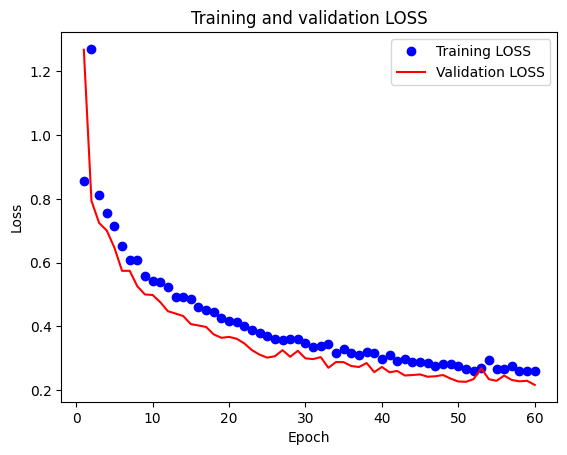

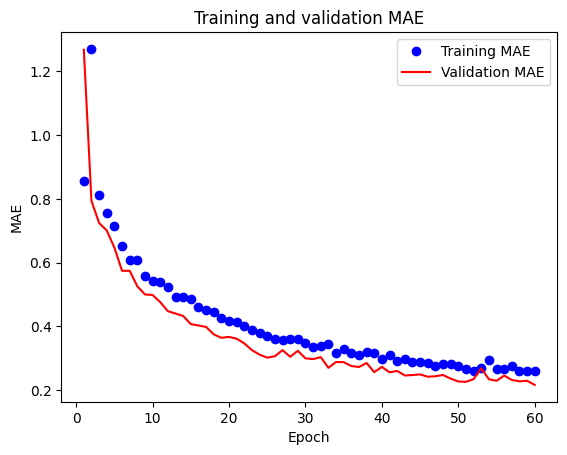

In [ ]:
import matplotlib.pyplot as plt
# Plot training and validation Loss
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training LOSS")
plt.plot(epochs, val_loss, "r", label="Validation LOSS")
plt.title("Training and validation LOSS")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Plot training and validation MAE
mae = history.history["mae"]
val_mae = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, mae, "bo", label="Training MAE")
plt.plot(epochs, val_mae, "r", label="Validation MAE")
plt.title("Training and validation MAE")
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()


In [ ]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                17152     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 23,425
Trainable params: 23,425
Non-trai

1/1 [==============================] - 1s 812ms/step


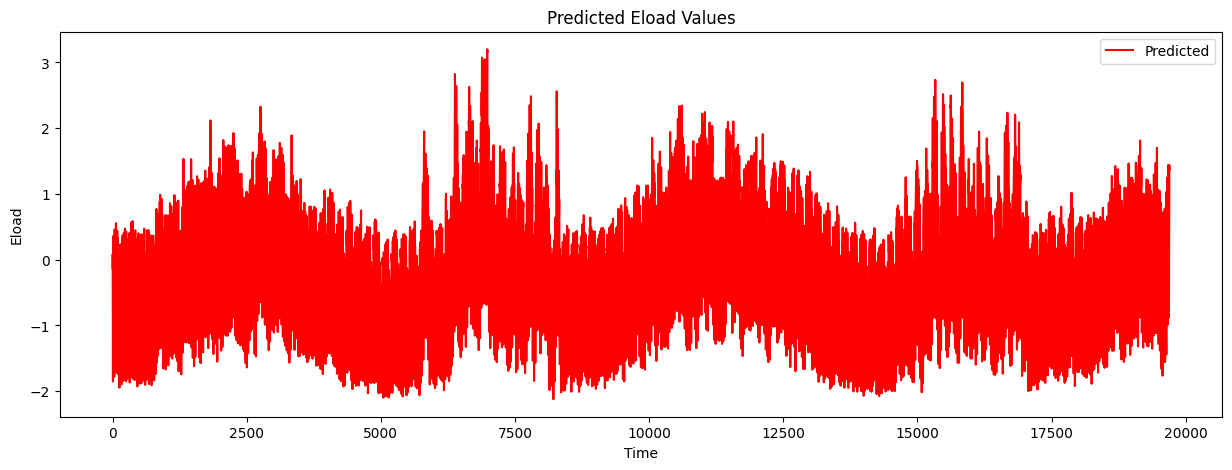

In [ ]:
import matplotlib.pyplot as plt

# Get the predicted values for the test dataset
y_pred = model.predict(test_dataset)

# Plot the predicted values
plt.figure(figsize=(15, 5))
plt.plot(y_pred, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('Eload')
plt.title('Predicted Eload Values')
plt.legend()
plt.show()

In [ ]:
len(y_pred)

19697

In [ ]:
lenpred = len(y_pred)
lenpred


19697

In [ ]:
org_targets = raw_data2[num_train_samples + num_val_samples:]

In [ ]:
len(org_targets)

19722

midtargets shape: (19697, 1)


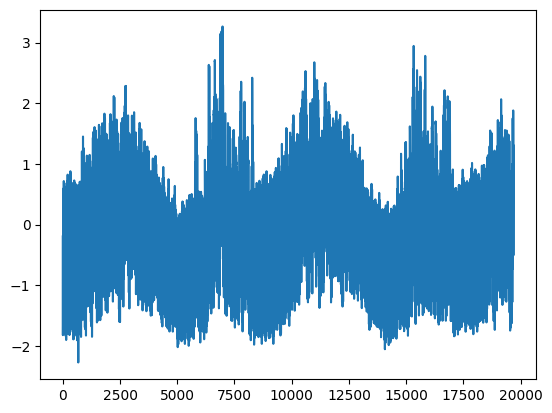

In [ ]:
left_crop = (sequence_length + horizon) * sampling_rate
right_crop = ( (sequence_length - 1) * sampling_rate) - 1
midtargets = org_targets[left_crop:-right_crop]
print("midtargets shape:", midtargets.shape)
plt.plot(range(lenpred), midtargets)

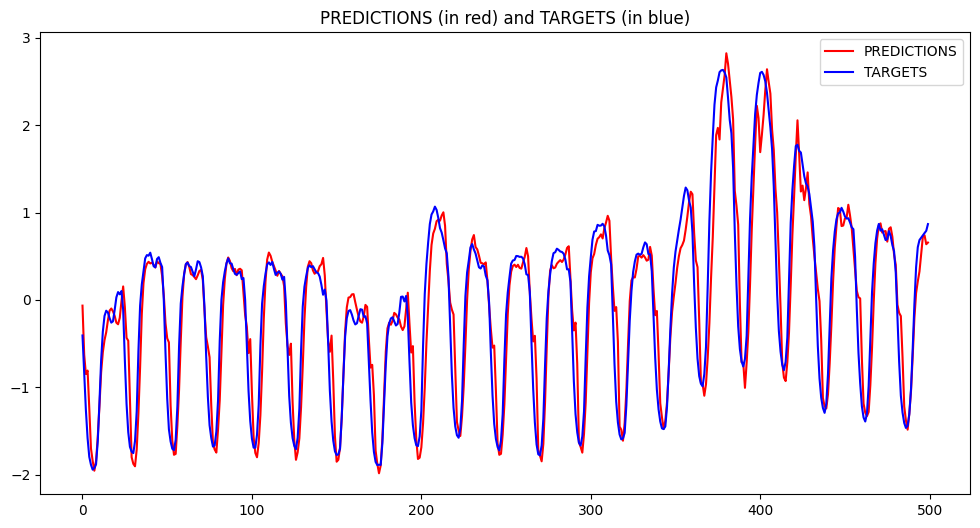

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_pred[6000:6500], "r", label="PREDICTIONS")
plt.plot(midtargets[6000:6500], "b", label="TARGETS")
plt.title("PREDICTIONS (in red) and TARGETS (in blue)")
plt.legend()
plt.show()

In [ ]:
# REVERTING (on predictions) THE "NORMALIZATION" of the targets
# TO YIELD THE "EFFECTIVE PREDICTIONS" (EFFpredictions)
# EFFpredictions1 = predictions * 585
EFFpredictions1 = np.asarray(y_pred * 585)
EFFpredictions2 = EFFpredictions1.flatten()

In [ ]:
EFFpredictions2

array([ -73.26048 ,   49.823624, -205.4965  , ...,  795.35034 ,
        837.33984 ,  804.7178  ], dtype=float32)

In [ ]:
MEANV = (np.ones(lenpred,)) * 3310
MEANV

array([3310., 3310., 3310., ..., 3310., 3310., 3310.])

In [ ]:
EFFpredictions = EFFpredictions2 + MEANV
EFFpredictions

array([3236.73951721, 3359.82362366, 3104.50349426, ..., 4105.3503418 ,
       4147.33984375, 4114.71777344])

In [ ]:
EFFpredictions.shape

(19697,)

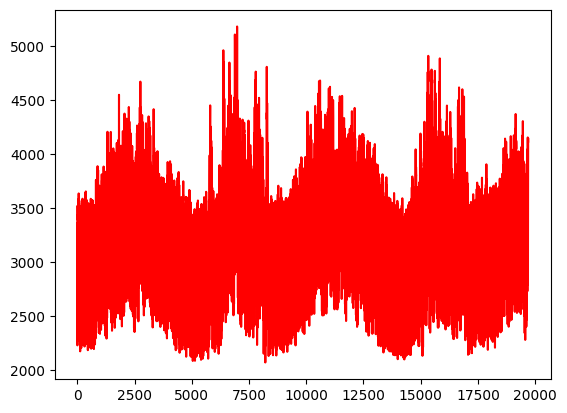

In [ ]:
plt.plot(range(lenpred), EFFpredictions,'r')

midNOSCALEeload shape: (19697,)


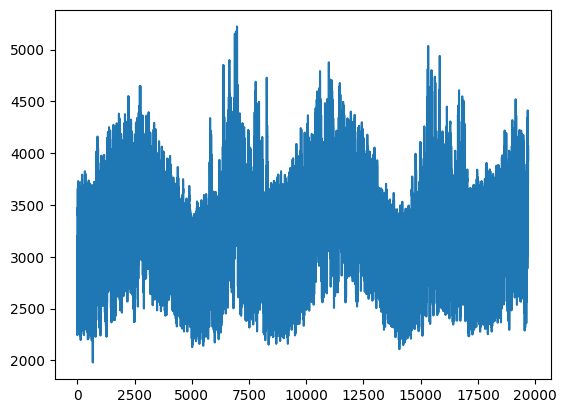

In [ ]:
NOSCALEeloadTESTtargets= eload[num_train_samples + num_val_samples:]
# Now cropping
midNOSCALEeload = NOSCALEeloadTESTtargets[left_crop:-right_crop]
print("midNOSCALEeload shape:", midNOSCALEeload.shape)
plt.plot(range(lenpred), midNOSCALEeload)

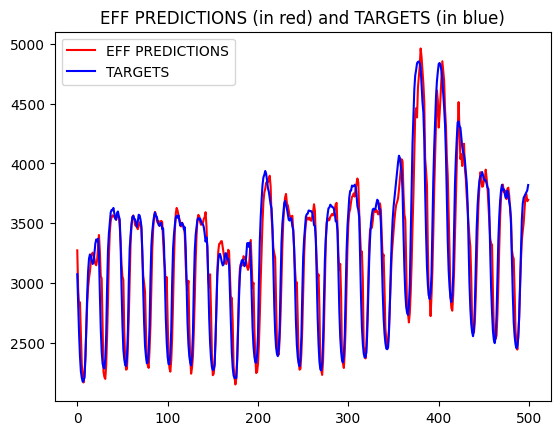

In [ ]:
# Now overlay plot of predictions and targets in the same interval
plt.plot(EFFpredictions[6000:6500], "r", label="EFF PREDICTIONS")
plt.plot(midNOSCALEeload[6000:6500], "b", label="TARGETS")
plt.title("EFF PREDICTIONS (in red) and TARGETS (in blue)")
plt.legend()
plt.show()

In [ ]:
EFFECTIVE_MAE = np.mean(np.abs(midNOSCALEeload - EFFpredictions))
print(f"EFFECTIVE real-scale MAE: {EFFECTIVE_MAE:.2f}")

EFFECTIVE real-scale MAE: 172.75
